# Лабораторна робота № 5
## Математичні і комп’ютерні моделі дослідження поведінки поширення соціальних процесів і систем.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random
import time
from matplotlib import animation

### 1. Модель експоненційного зростання населення. 
### $y_t = y_{t-1} + a y_{t-1} = (1 + a)y_{t-1}$

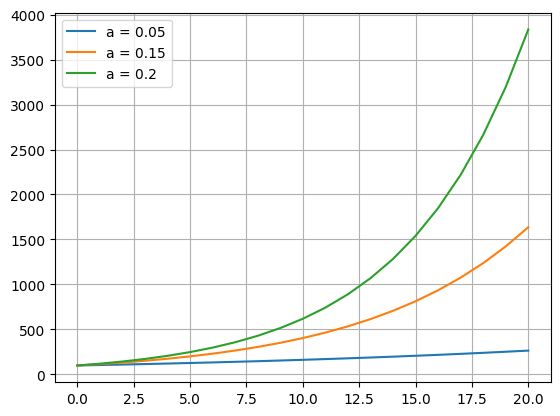

In [3]:
y0 = 100         
T = 20           

def exp(y0, a, T):
    y = [y0]
    for t in range(1, T + 1):
        y.append((1 + a) * y[t - 1])
    return y

plt.figure()

a_values = [0.05, 0.15, 0.2]  
for a in a_values:
    y = exp(y0, a, T)
    plt.plot(range(T + 1), y, label=f"a = {a}")

plt.legend()
plt.grid(True)
plt.show()

### 2. Модель гонки озброєнь Річардсона.
$$
\begin{cases}
\dfrac{dx}{dt} = ay - mx + r, \\
\dfrac{dy}{dt} = bx - ny + s.
\end{cases}
$$

In [ ]:
x0 = 5   
y0 = 3   
initial_value = [x0, y0]
t = np.linspace(0, 50, 500)

parameters = [
    {"a": 0.5, "b": 0.4, "m": 0.6, "n": 0.7, "r": 1, "s": 1},
    {"a": 0.5, "b": 0.4, "m": 0.3, "n": 0.4, "r": 1, "s": 1},
    {"a": 0.5, "b": 0.4, "m": 0.6, "n": 0.7, "r": -1, "s": -1},
    {"a": 0.5, "b": 0.4, "m": 0.3, "n": 0.4, "r": -1, "s": -1}
]

def richardson(vars, t, a, b, m, n, r, s):
    x, y = vars
    dxdt = a*y - m*x + r
    dydt = b*x - n*y + s
    return [dxdt, dydt]

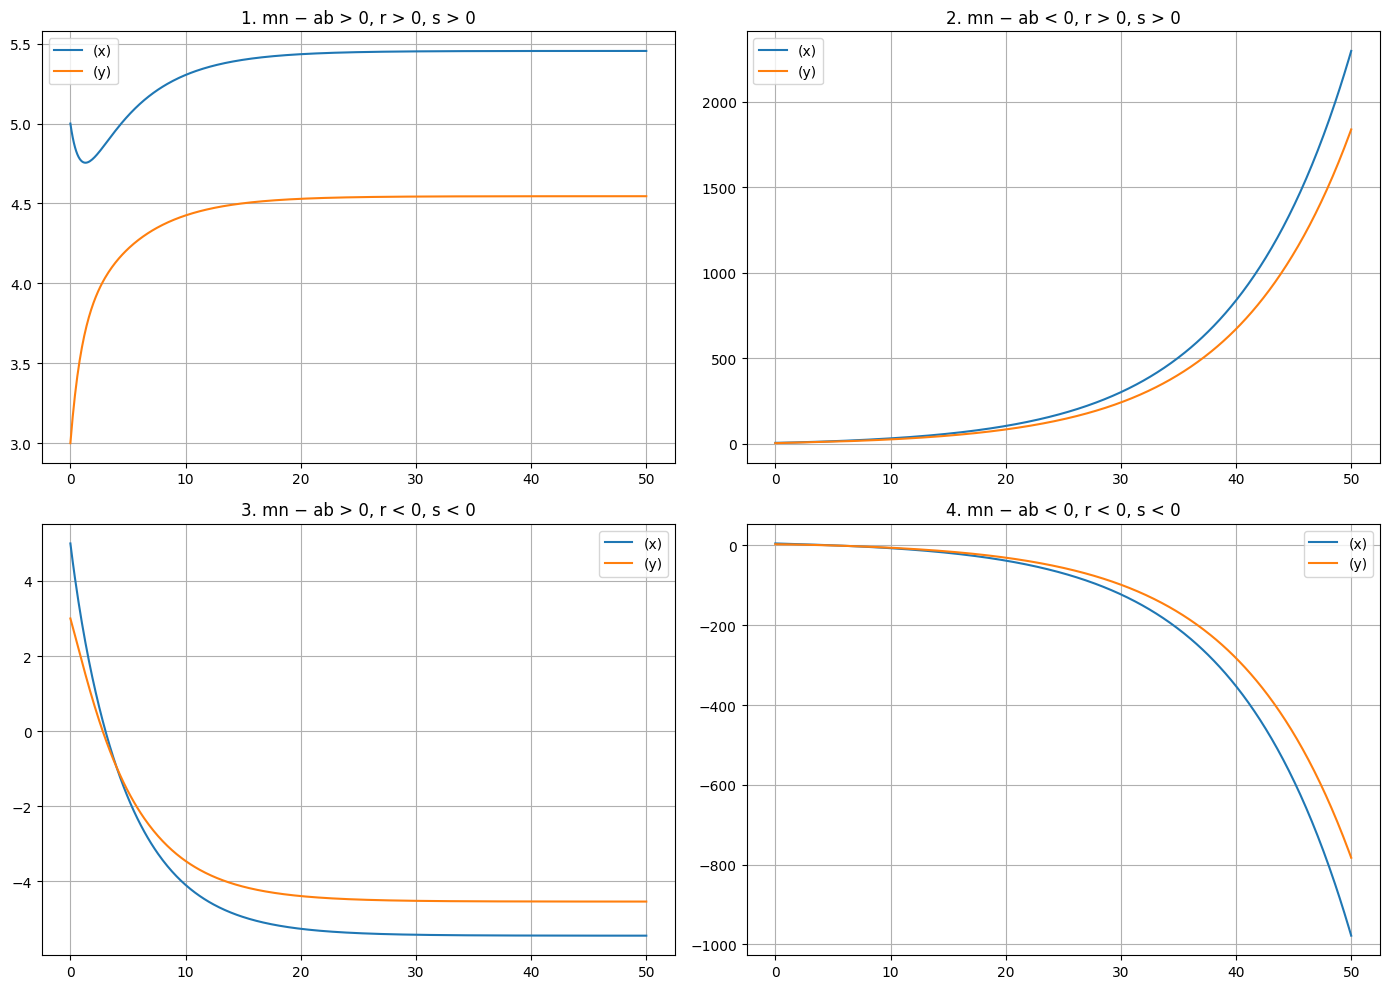

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

titles = [
    "1. mn − ab > 0, r > 0, s > 0",
    "2. mn − ab < 0, r > 0, s > 0",
    "3. mn − ab > 0, r < 0, s < 0",
    "4. mn − ab < 0, r < 0, s < 0"
]

for i, params in enumerate(parameters):
    solution = odeint(
        richardson,
        initial_value,
        t,
        args=(params["a"], params["b"], params["m"],
              params["n"], params["r"], params["s"])
    )

    x, y = solution.T

    axes[i].plot(t, x, label="(x)")
    axes[i].plot(t, y, label="(y)")
    axes[i].set_title(titles[i])
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### 3. Mодель виборця

In [47]:
N = 10          
tests = 20      
ros = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 

def initialize(N, ro):
    
    random.seed(time.time())  
    grid = np.zeros((N, N), dtype=int) 
    
    for i in range(N):
        for j in range(N):
            rnd = random.random()  
            if rnd <= ro:
                grid[i, j] = 1
            else:
                grid[i, j] = -1         
    return grid

def is_consensus(grid):
    return np.all(grid == 1) or np.all(grid == -1)

def random_neighbor(i, j, N):
    directions = [(-1,0), (-1,1), (0,1), (1,1), (1,0), (1,-1), (0,-1), (-1,-1)]
    while True:
        di, dj = random.choice(directions)
        ni, nj = i + di, j + dj
        if 0 <= ni < N and 0 <= nj < N:
            return ni, nj

def voter_model(N, ro):
    grid = initialize(N, ro)
    iterations = 0
    while not is_consensus(grid):
        vi, vj = random.randint(0, N-1), random.randint(0, N-1)
        ni, nj = random_neighbor(vi, vj, N)
        grid[vi, vj] = grid[ni, nj]
        iterations += 1
    return grid[0,0], iterations  

In [49]:
for ro in ros:
    count = 0
    iterations = []
    
    for _ in range(tests):
        consensus, iters = voter_model(N, ro)
        iterations.append(iters)
        if consensus == 1:
            count += 1

    print(f"ro = {ro:.1f} | number of iterations = {np.mean(iterations):.1f}")

ro = 0.2 | number of iterations = 6893.2
ro = 0.3 | number of iterations = 10836.0
ro = 0.4 | number of iterations = 11579.2
ro = 0.5 | number of iterations = 10884.1
ro = 0.6 | number of iterations = 9861.4
ro = 0.7 | number of iterations = 6648.1
ro = 0.8 | number of iterations = 11724.3


### 4. Модель взаємодії

In [ ]:
N = 50         
total_individuals = N * N
opinions_count = 256    
steps = 3000        
tests = 10         
   
e_values = [10, 50, 100]  
m_values = [0.3, 0.6]

def initialize(N, opinions_count):
    lattice = np.random.randint(1, opinions_count + 1, size=(N, N))
    return lattice

def is_consensus(lattice):
    return np.all(lattice == lattice[0,0])

def interaction_step(lattice, e, m):
    ax, ay = random.randint(0, N-1), random.randint(0, N-1)
    bx, by = random.randint(0, N-1), random.randint(0, N-1)
    
    o_i = lattice[ax, ay]
    o_j = lattice[bx, by]
   
    if (o_i - o_j) < e:
        delta = (m / 2) * (o_i - o_j)
        lattice[ax, ay] = int(lattice[ax, ay] - delta)
        lattice[bx, by] = int(lattice[bx, by] + delta)

def run_simulation(N, opinions_count, e, m, max_steps):
    lattice = initialize(N, opinions_count)
    steps = 0
    while not is_consensus(lattice) and steps < max_steps:
        interaction_step(lattice, e, m)
        steps += 1
    consensus_reached = is_consensus(lattice)
    return lattice, steps, consensus_reached

In [64]:
for e in e_values:
    for m in m_values:
        print(f"\nПараметри: e = {e}, m = {m}")
        total_steps = 0
        consensuses = 0
        
        steps_list = []
        
        for test in range(tests):
            lattice, steps, consensus = run_simulation(N, opinions_count, e, m, steps)
            total_steps += steps
            steps_list.append(steps)
            
            if consensus:
                consensuses += 1
                print(f"Consensus in {steps} steps.")
            else:
                print(f"Consensus is not reached in {steps} steps due extremists")
        
        if consensuses > 0:
            avg_steps = total_steps / tests
        else:
            avg_steps = steps
        
        print(f"\nConsensus reached in {consensuses} of {tests} tests ({(consensuses/tests)*100:.0f} %)")
        print(f"Average steps count to reach consensus: {int(avg_steps)}")



Параметри: e = 10, m = 0.3
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists

Consensus reached in 0 of 10 tests (0 %)
Average steps count to reach consensus: 3000

Параметри: e = 10, m = 0.6
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extremists
Consensus is not reached in 3000 steps due extr

### 5. Модель Шнайда

In [ ]:
L = 50                      
steps = 5000             
bias_percentages = [1, 5, 10] 

def initialize(L, bias_percent):
  
    total_cells = L * L
    m = int(total_cells * bias_percent / 100)
    lattice = np.zeros((L, L), dtype=int)
    
    count = 0
    while count < m:
        i, j = random.randint(0, L-1), random.randint(0, L-1)
        if lattice[i, j] == 0:
            lattice[i, j] = 1
            count += 1
    return lattice

def is_consensus(lattice):
    first_value = lattice[0,0]
    return np.all(lattice == first_value)

def get_neighbors(i, j, L):
    neighbors = []
    for di in [-1,0,1]:
        for dj in [-1,0,1]:
            if di == 0 and dj == 0:
                continue
            ni = (i + di) % L
            nj = (j + dj) % L
            neighbors.append((ni, nj))
    return neighbors

def sznajd_step(lattice):
    vi, vj = random.randint(0, L-1), random.randint(0, L-1)
    neighbors = get_neighbors(vi, vj, L)
    ni, nj = random.choice(neighbors)

    if lattice[vi, vj] == lattice[ni, nj]:
        for nni, nnj in get_neighbors(vi, vj, L):
            lattice[nni, nnj] = lattice[vi, vj]
        for nni, nnj in get_neighbors(ni, nj, L):
            lattice[nni, nnj] = lattice[vi, vj]

def sznajd(L, bias_percent, max_steps):
    lattice = initialize(L, bias_percent)
    steps = 0
    while not is_consensus(lattice) and steps < max_steps:
        sznajd_step(lattice)
        steps += 1
    consensus_value = lattice[0,0]
    return lattice, steps, consensus_value

In [ ]:
for bias in bias_percentages:
    lattice, steps, consensus = sznajd(L, bias, steps)
    print(f"Початкова перевага: {bias}%, Консенсус: {consensus}, Кроків до консенсусу: {steps}")

Початкова перевага: 1%, Консенсус: 0, Кроків до консенсусу: 428
Початкова перевага: 5%, Консенсус: 0, Кроків до консенсусу: 428
Початкова перевага: 10%, Консенсус: 0, Кроків до консенсусу: 428


## 6. Модель сегрегації населення
### Розглядається два правила поведінки мешканців, які оцінюють відсоток прийнятних сусідів (використовувалося околиця Мура):
- не менше половини сусідніх будинків мають бути заселені
представниками тієї ж раси;
- не менше третини сусідів належать тій самій расі.

In [ ]:
L = 70
empty_cof = 0.25
threshold = 0.5
steps = 100

def initialize(L, empty_cof):
    
    grid = np.zeros((L, L), dtype=int)
    total_cells = L * L
    
    n_empty = int(total_cells * empty_cof)
    n_white = int((total_cells - n_empty) / 2)
    n_black = total_cells - n_empty - n_white
    states = [0]*n_empty + [1]*n_white + [2]*n_black
    
    random.shuffle(states)
    
    for i in range(L):
        for j in range(L):
            grid[i, j] = states.pop()
    return grid

def get_neighbors(i, j, L):
    
    neighbors = []
    
    for di in [-1,0,1]:
        for dj in [-1,0,1]:
            if di == 0 and dj == 0:
                continue
            ni = (i + di) % L
            nj = (j + dj) % L
            neighbors.append((ni, nj))
            
    return neighbors

def satisfied(grid, i, j, threshold):
    
    if grid[i, j] == 0:
        return True
    
    neighbors = get_neighbors(i, j, L)
    same_race = sum(1 for ni, nj in neighbors if grid[ni, nj] == grid[i, j])
    occupied_neighbors = sum(1 for ni, nj in neighbors if grid[ni, nj] != 0)
    
    if occupied_neighbors == 0:
        return True
    
    return same_race / occupied_neighbors >= threshold

def schelling_step(grid, threshold):
    
    unhappy = []
    L = grid.shape[0]
    
    for i in range(L):
        for j in range(L):
            if grid[i, j] != 0 and not satisfied(grid, i, j, threshold):
                unhappy.append((i, j))
    empty_cells = [(i, j) for i in range(L) for j in range(L) if grid[i, j] == 0]
    
    for i, j in unhappy:
        if empty_cells:
            new_i, new_j = random.choice(empty_cells)
            grid[new_i, new_j] = grid[i, j]
            grid[i, j] = 0
            empty_cells.remove((new_i, new_j))
            empty_cells.append((i, j))

In [ ]:
def update(frame, img, grid):
    schelling_step(grid, threshold)
    img.set_data(grid)
    return [img]

grid = initialize(L, empty_cof)

fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='brg', vmin=0, vmax=2)
ax.set_title("Модель расової сегрегації Schelling")
ax.axis('off')

ani = animation.FuncAnimation(fig, update, fargs=(img, grid), frames=steps, interval=200, repeat=False)

ani.save('schelling_simulation.gif', writer='pillow')
plt.close(fig)